# Quantify the uncertainty and ploting synthetic EIS data 

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 5)  #set default figure size
plt.rcParams["font.family"] = "Times New Roman"
import numpy as np
import os, sys 
import pandas as pd
from sklearn.preprocessing import StandardScaler, Normalizer
import scipy
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.linear_model import LinearRegression

sys.path.append(os.path.abspath(r'C:\Users\mero_\Documents\UM\Phd\y2s2\EIS_pile_up'))
from PEMFC_project import _samplings , _equivalent_circuits, _reconstruct_Nyquist_plot,_data_summery 

In [2]:
df_p_sel2 = pd.read_csv('df_p_sel2.csv',header=0)
df_zf2 = pd.read_csv('df_z_sel2.csv',header=0)
_data_summery.target_summery(df_p_sel2['O2 stoi gpc'])

,counts,proportion
O2 stoi gpc,,
1.5,130,0.156250
1.8,130,0.156250
2.2,122,0.146635
2.5,122,0.146635
1.6,118,0.141827
2.0,118,0.141827
3.0,92,0.110577


In [3]:
zf_std = df_zf2.groupby(df_zf2.iloc[:,-1]).std()
zf_m = df_zf2.groupby(df_zf2.iloc[:,-1]).mean()
zf_errbu = zf_std.iloc[:,:-1]*2
zf_errbl =  zf_std.iloc[:,:-1]*2

In [7]:

df_m = df_p_sel2.groupby('O2 stoi gpc').mean()
df_std = df_p_sel2.groupby('O2 stoi gpc').std()

df_m.drop(labels=[1.6], inplace=True)
df_std.drop(labels=[1.6], inplace=True)
X_m = ((df_m['Rct']*28.3/(df_m['J lim']*1e-4))**2).values.reshape(-1,1)
y_m = df_m['Rt']*28.3

reg = LinearRegression().fit(X_m , y_m)
R2_score = reg.score(X_m,y_m)
print('R2=%0.4f'%R2_score)
print('y=%0.4f*(R_ct/J_lim)**2+%0.4f'%(reg.coef_[0],reg.intercept_))

R2=0.9912
y=7.0042*(R_ct/J_lim)**2+0.0421


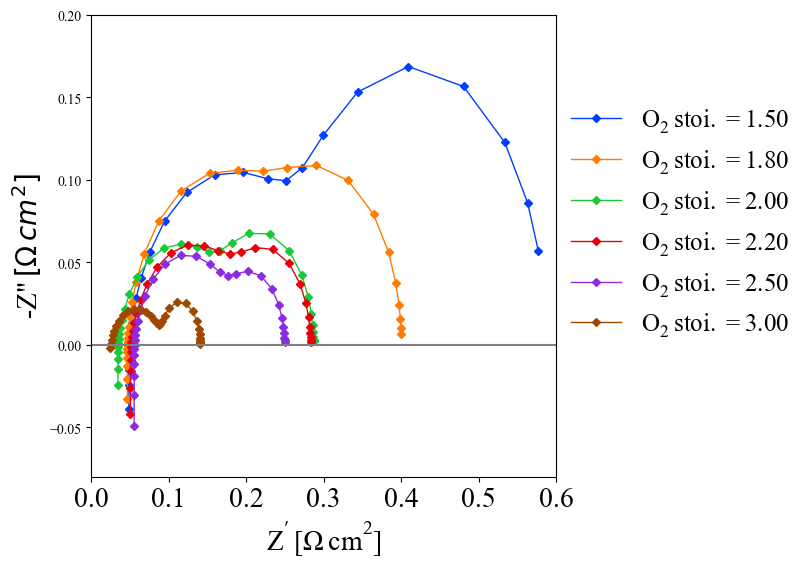

In [11]:
plt.figure(figsize=(6,6))
labels = []
target = [1.5,1.8,2.0,2.2,2.5,3.0] 
palette = sns.color_palette("bright",len(np.unique(target)))
i=0
for stoi in (df_m.index):
    labels.append('$\mathregular{O_2{\/}stoi.= %0.2f}$'%stoi)
    zf=_equivalent_circuits.zf_cal(df_m.iloc[i,0], df_m.iloc[i,1], df_m.iloc[i,2], df_m.iloc[i,3],
                                  df_m.iloc[i,4], df_m.iloc[i,5], df_m.iloc[i,6])
    zf_s = np.asarray(zf).ravel()*28.3
    #plt.scatter(df_z_m.loc[stoi][:31], df_z_m.loc[stoi][31:], s=10,marker='D',c=np.array(palette[i]).reshape(1,-1))
    plt.plot(zf_s[:31], zf_s[31:],'D-', linewidth=1,markersize=4, c=palette[i])
    i+=1
    
order = [0,1,2,3,4,5,6]     
plt.legend(labels=labels,loc='upper right',markerscale=1,frameon=False, fontsize=18,bbox_to_anchor=(1.55, 0.85))
plt.xticks(np.linspace(0,0.6,7),fontsize=20)
#plt.yticks(np.linspace(-0.5,3,8),fontsize=20)
plt.ylabel('-Z"${{\\/}[Ω{\\/}cm^2]}$', fontsize=20)
plt.xlabel('$\mathregular{Z\'{\\/}[Ω{\\/}cm^2]}$', fontsize=20)
plt.ylim([-0.08,0.20])
plt.xlim([0,0.6])
plt.plot(np.linspace(0,0.6,5), np.zeros(5),'-',c='grey')

C:\Users\mero_\AppData\Local\Temp\ipykernel_320\2023117264.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c='k',label='$\mathregular{y=%0.4fx+%0.4f}$\n $\mathregular {R^2=%0.3f}$'%(reg.coef_,reg.intercept_,R2_score))


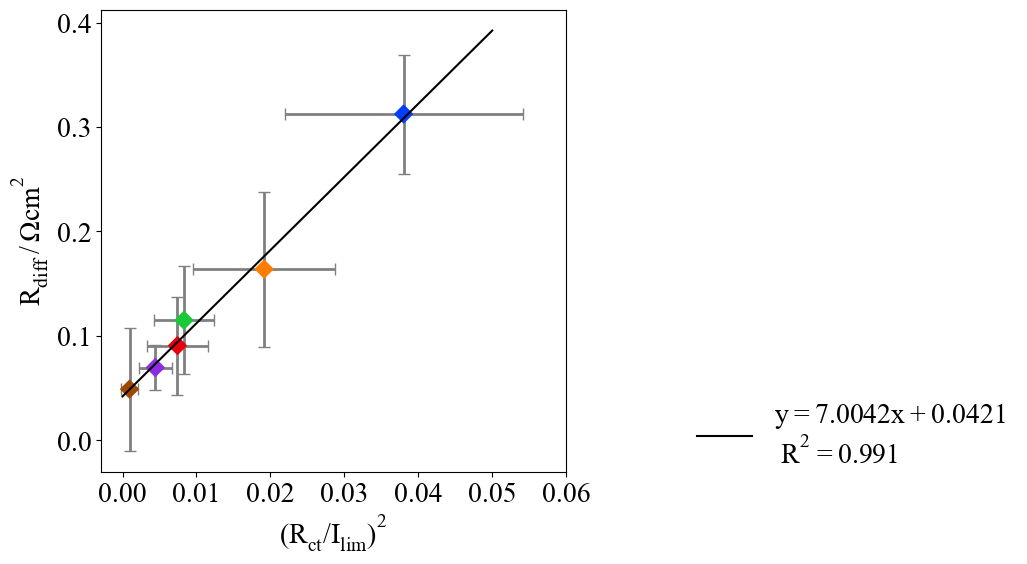

In [20]:
plt.figure(figsize=(6,6))
x_std = df_std['(Rct/Jlim)^2'].values*(28.3/1e-4)**2
x_std = x_std
y_std = df_std['Rt'].values*28.3
y_std = y_std

plt.scatter(X_m,y_m, s=80,marker='D', c= palette[:],edgecolor=palette[:],label=None,zorder=1)
plt.plot(np.linspace(-1e-12,5e-2, 100),reg.coef_*np.linspace(-1e-12,5e-2, 100)+reg.intercept_,
              c='k',label='$\mathregular{y=%0.4fx+%0.4f}$\n $\mathregular {R^2=%0.3f}$'%(reg.coef_,reg.intercept_,R2_score))
plt.errorbar(X_m.ravel(),y_m.ravel(), xerr=x_std, yerr=y_std, elinewidth=2, fmt='none',capsize=4, c='grey', marker='o',zorder=-1)
plt.xticks(np.linspace(0,6e-2,7), fontsize=20)
plt.yticks(fontsize=20)
#plt.xlim(-5e-14, 0.8e-2)
#plt.xscale('log')
#plt.yscale('log')
plt.rcParams.update({'font.size': 20})
plt.ylabel('$\mathregular{R_{diff}{\\/}/{\\/}Ωcm^{2}}$', fontsize=20)
plt.xlabel('$\mathregular{(R_{ct}/I_{lim})^2}$', fontsize=20)

plt.legend( loc='lower right',markerscale=1,frameon=False, fontsize=20,bbox_to_anchor=(2, -0.05))
#plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0), useLocale=False, useMathText=True)

In [24]:
import scipy.stats as st
stois = [1.5,1.8,2.0,2.2,2.5,3.0]
df_CI = pd.DataFrame(index=stois, columns=['Rt_1','Rt_2','(Rct/Jlim)^2_1','(Rct/Jlim)^2_2'])

for stoi in (stois):
    ind = np.where(df_p_sel2['O2 stoi gpc']==stoi)[0]
    data_Rt = df_p_sel2.loc[ind,'Rt']*28.3
    data_2 = df_p_sel2.loc[ind,'(Rct/Jlim)^2']*(28.3/1e-4)**2

    #create 95% confidence interval for population mean weight
    Rt_CI = st.norm.interval(alpha=0.95,  loc=np.mean(data_Rt), scale=st.sem(data_Rt)) 
    Rj_CI = st.norm.interval(alpha=0.95,  loc=np.mean(data_2), scale=st.sem(data_2)) 
    df_CI.loc[stoi] = [Rt_CI[0],Rt_CI[1],Rj_CI[0],Rj_CI[1]]
df_CI

,Rt_1,Rt_2,(Rct/Jlim)^2_1,(Rct/Jlim)^2_2
1.5,0.302633,0.322216,0.0370055,0.0425353
1.8,0.151232,0.176729,0.0187456,0.0220547
2.0,0.105726,0.124327,0.00812105,0.00958815
2.2,0.0824692,0.0990979,0.00730219,0.00878668
2.5,0.0660086,0.0735149,0.00433378,0.00512055
3.0,0.0370941,0.0611423,0.000905362,0.00136384


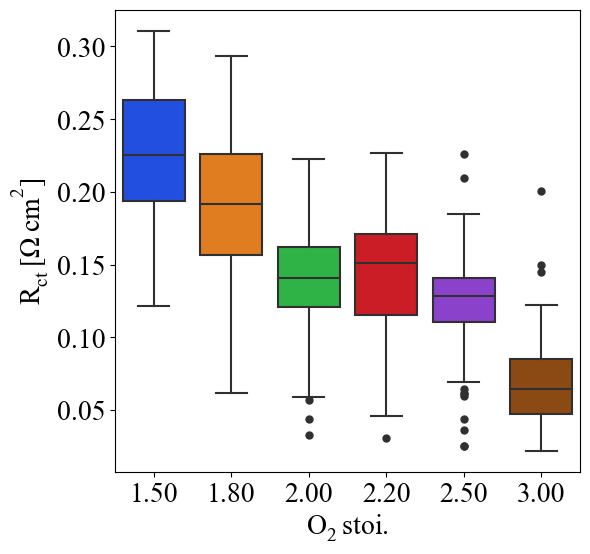

In [21]:
ticks =['%0.2f'%x for x in target]
df_p = df_p_sel2.drop(index=df_p_sel2[df_p_sel2['O2 stoi gpc']==1.6].index)
df_p['Rct'] = df_p['Rct']*28.3
plt.figure(figsize=(6,6))
box_plot = sns.boxplot(x='O2 stoi gpc', y="Rct", data=df_p, palette=palette,fliersize=5, flierprops={"marker": "o"})
box_plot.set(
    xlabel='$\mathregular{O_2{\/}stoi.}$', 
    ylabel='$\mathregular{R_{ct}{\/}[Ω{\/}cm^{2}]}$')
box_plot.set_xticklabels(ticks,font = "Times New Roman")
#plt.yticks(np.linspace(0,5,6))
plt.rcParams.update({'font.size': 20})

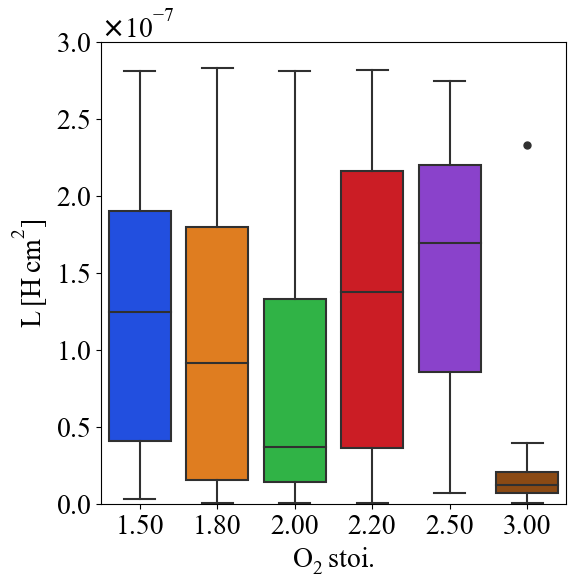

In [22]:
df_p['L'] = df_p['L']*28.3
plt.figure(figsize=(6,6))
box_plot = sns.boxplot(x='O2 stoi gpc', y="L", data=df_p, palette=palette,fliersize=5, flierprops={"marker": "o"})
box_plot.set(
    xlabel='$\mathregular{O_2{\/}stoi.}$', 
    ylabel='$\mathregular{L{\/}[H{\/}cm^{2}]}$')
box_plot.set_xticklabels(ticks,font = "Times New Roman")
plt.rcParams.update({'font.size': 20})
plt.ylim(0,3e-7)
plt.ticklabel_format(axis="y", style="sci", scilimits=(2,0), useLocale=False, useMathText=True)

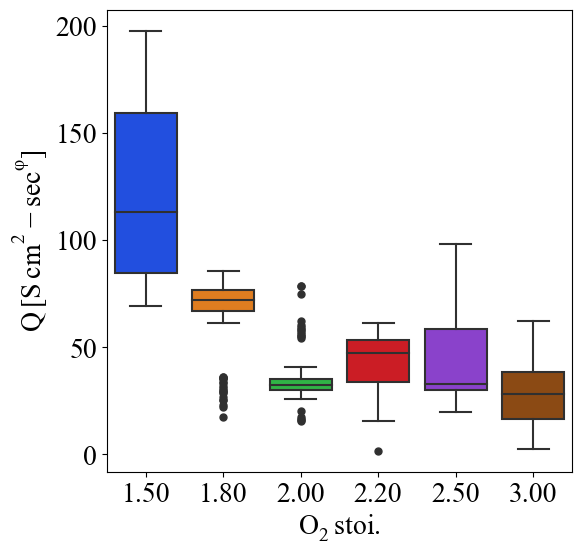

In [23]:
df_p['Q'] = df_p['Q']*28.3
plt.figure(figsize=(6,6))
box_plot = sns.boxplot(x='O2 stoi gpc', y="Q", data=df_p, palette=palette,fliersize=5, flierprops={"marker": "o"})
box_plot.set(
    xlabel='$\mathregular{O_2{\/}stoi.}$', 
    ylabel='$\mathregular{Q{\/}[S{\/}cm^2-sec^φ]}$')
box_plot.set_xticklabels(ticks,font = "Times New Roman")
plt.rcParams.update({'font.size': 20})

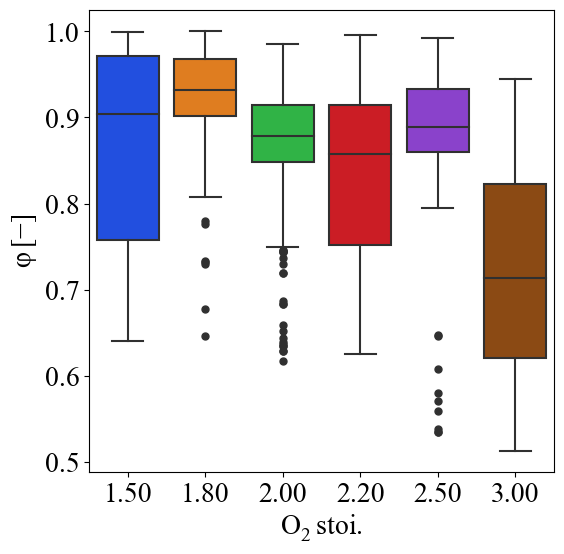

In [24]:
plt.figure(figsize=(6,6))
box_plot = sns.boxplot(x='O2 stoi gpc', y="phi", data=df_p, palette=palette,fliersize=5, flierprops={"marker": "o"})
box_plot.set(
    xlabel='$\mathregular{O_2{\/}stoi.}$', 
    ylabel='$\mathregular{φ{\/}[-]}$')
box_plot.set_xticklabels(ticks,font = "Times New Roman")
plt.rcParams.update({'font.size': 20})

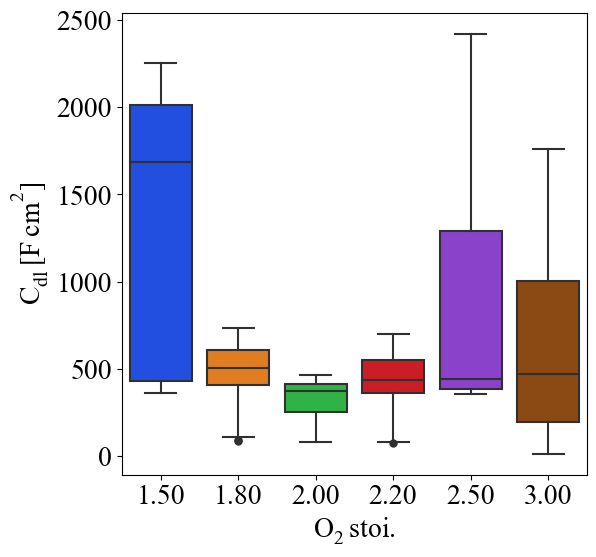

In [25]:
df_p['Cdl'] = df_p['Cdl']*28.3
plt.figure(figsize=(6,6))
box_plot = sns.boxplot(x='O2 stoi gpc', y="Cdl", data=df_p, palette=palette,fliersize=5, flierprops={"marker": "o"})
box_plot.set(
    xlabel='$\mathregular{O_2{\/}stoi.}$', 
    ylabel='$\mathregular{C_{dl}{\/}[F{\/}cm^2]}$')
box_plot.set_xticklabels(ticks,font = "Times New Roman")
plt.rcParams.update({'font.size': 20})

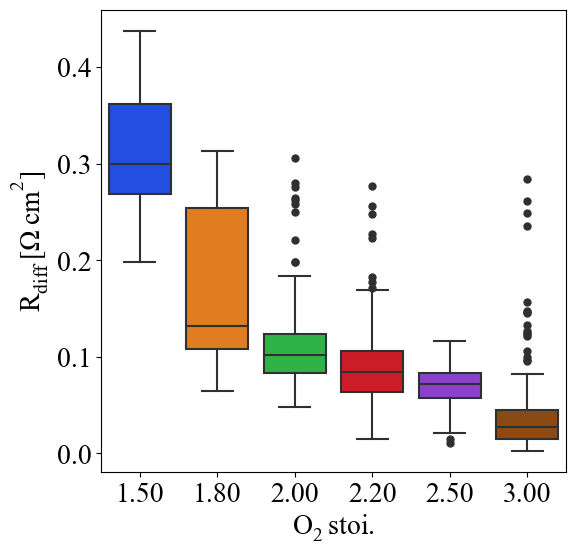

In [26]:
df_p['Rt'] = df_p['Rt']*28.3
plt.figure(figsize=(6,6))
box_plot = sns.boxplot(x='O2 stoi gpc', y="Rt", data=df_p, palette=palette,fliersize=5, flierprops={"marker": "o"})
box_plot.set(
    xlabel='$\mathregular{O_2{\/}stoi.}$', 
    ylabel='$\mathregular{R_{diff}{\/}[Ω{\/}cm^{2}]}$')
box_plot.set_xticklabels(ticks,font = "Times New Roman")
plt.rcParams.update({'font.size': 20})

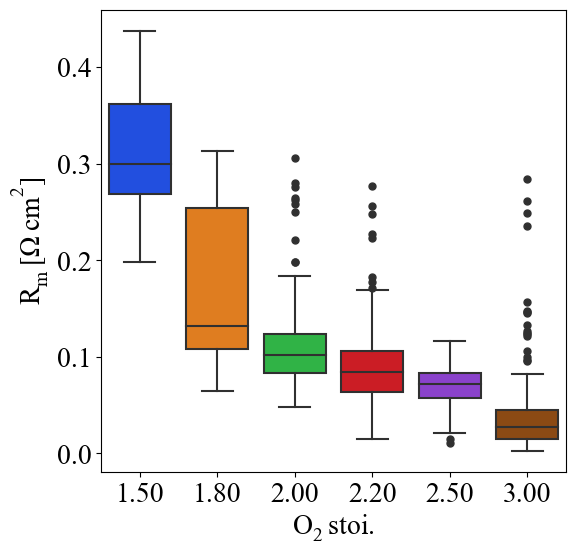

In [27]:
df_p['Rm'] = df_p['Rm']*28.3
plt.figure(figsize=(6,6))
box_plot = sns.boxplot(x='O2 stoi gpc', y="Rt", data=df_p, palette=palette,fliersize=5, flierprops={"marker": "o"})
box_plot.set(
    xlabel='$\mathregular{O_2{\/}stoi.}$', 
    ylabel='$\mathregular{R_{m}{\/}[Ω{\/}cm^{2}]}$')
box_plot.set_xticklabels(ticks,font = "Times New Roman")
plt.rcParams.update({'font.size': 20})